In [56]:
pip install -q monai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install datasets

   ---------------------------------------- 0.0/510.5 kB ? eta -:--:--
   --------------------------------------- 510.5/510.5 kB 33.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ---------------------------------------- 116.3/116.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/170.9 kB ? eta -:--:--
   ---------------------------------------- 170.9/170.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/366.0 kB ? eta -:--:--
   --------------------------------------- 366.0/366.0 kB 22.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.9 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.9 MB 129.9 MB/s eta 0:00:01
   --- ------------------------------------ 2.1/24.9 MB 129.9 MB/s eta 0:00:01
   --- ------------------------------------ 2.1/24.9 MB 129.9 MB/s eta 0:00:01
   --- ------------------------------------ 2.1/24.9 MB 129.9 MB/s eta 0:00:01
   --- -----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
pip install transformers

     ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
     -------- ------------------------------ 30.7/134.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 134.8/134.8 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/8.8 MB 13.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.8 MB 15.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.6/8.8 MB 20.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.1/8.8 MB 24.1 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.8 MB 28.9 MB/s eta 0:00:01
   ---------------------------------------  8.8/8.8 MB 33.2 MB/s eta 0:00:01
   ---------------------------------------- 8.8/8.8 MB 31.3 MB/s eta 0:00:00
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!nvidia-smi

Thu Apr  4 13:00:09 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   36C    P8    18W / 180W |   2170MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [59]:
torch.cuda.is_available()

False

In [18]:
from ultralytics import SAM
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
model = SAM('sam_b.pt')

100%|███████████████████████████████████████████████████████████████████████████████| 358M/358M [00:10<00:00, 35.7MB/s]


In [5]:
model.info()

Model summary: 238 layers, 93735472 parameters, 93735472 gradients


(238, 93735472, 93735472, 0.0)

In [13]:
# TODO
# 1. 데이터 셋 폴더 구조 구축
# 2. 데이터 라벨링 데이터 확인
# 3. 원천 데이터 이미지 확인
# 4. 모델 학습 및 SAM 하이퍼 파라미터 조정
# 5. 모델 평가

#### 데이터셋 압축 풀기

In [15]:
import shutil
file_name = "./dataset/ss_aney_btwg3ny_mn_seh_ss.v3i.png-mask-semantic.zip"
output_dir = "./dataset/eye_image_seg"
format = "zip"
shutil.unpack_archive(file_name, output_dir, format)

In [43]:
from PIL import Image
from datasets import Dataset
import os

def create_image_dataset(folder_path, target_size=(256, 256)):
    image_paths = []
    mask_paths = []
    
    # 폴더 내의 모든 파일을 순회
    for file in os.listdir(folder_path):
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            image_path = os.path.join(folder_path, file)
            mask_path = os.path.join(folder_path, os.path.splitext(file)[0] + "_mask.png")
            
            # 마스킹 파일이 실제로 존재하는지 확인
            if os.path.isfile(mask_path):
                # 이미지와 마스크를 열고 리사이징
                image = Image.open(image_path).resize(target_size)
                mask = Image.open(mask_path).resize(target_size)
                
                image_paths.append(image)
                mask_paths.append(mask)
    
    # 데이터셋 생성
    dataset = Dataset.from_dict({
        'image': image_paths,
        'mask': mask_paths
    })
    
    return dataset

# 폴더 경로
folder_path = './dataset/eye_image_seg/train'
# 데이터셋 생성 (이미지와 마스크를 256x256 크기로 리사이징)
dataset = create_image_dataset(folder_path, target_size=(256, 256))

# 데이터셋 예시 출력 (PIL 이미지 객체이므로, shape 대신 size 속성을 사용)
print(dataset[0]['image'].size, dataset[0]['mask'].size)

(256, 256) (256, 256)


In [60]:
len(dataset)

18

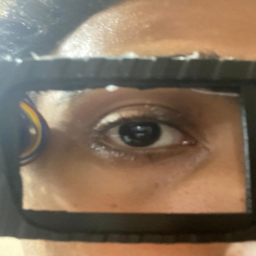

In [44]:
example = dataset[0]
image = example["image"]
image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

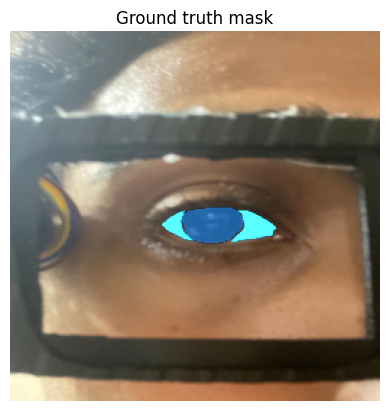

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

fig, axes = plt.subplots()

axes.imshow(np.array(image))
ground_truth_seg = np.array(example["mask"])
show_mask(ground_truth_seg, axes)
axes.title.set_text(f"Ground truth mask")
axes.axis("off")

In [46]:
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [47]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["mask"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [48]:
from transformers import SamProcessor

processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [49]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [50]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [51]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

In [52]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])


In [53]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [54]:
from transformers import SamModel

model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [57]:
from torch.optim import Adam
import monai

# Note: Hyperparameter tuning could improve performance here
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)

seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [58]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

num_epochs = 5

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:27<00:00,  9.68s/it]


EPOCH: 0
Mean loss: 0.18081413043869865


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:24<00:00,  9.44s/it]


EPOCH: 1
Mean loss: -0.05848304430643717


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:24<00:00,  9.40s/it]


EPOCH: 2
Mean loss: -0.30348524782392716


  0%|                                                                                            | 0/9 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [26]:
import os
import random

def get_random_image_path(folder_path):
    files_and_dirs = os.listdir(folder_path)
    
    image_files = [file for file in files_and_dirs if os.path.isfile(os.path.join(folder_path, file)) and file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if image_files:
        return os.path.join(folder_path, random.choice(image_files))
    else:
        return None

folder_path = './dataset/eye_image_seg/train'
random_image_path = get_random_image_path(folder_path)

if random_image_path:
    print("Random Image Path:", random_image_path)
else:
    print("No images found in the folder.")


Random Image Path: ./dataset/eye_image_seg/train\WhatsApp-Video-2023-07-08-at-03_35_57_mp4-1_jpg.rf.8b886fc9a79af9762e74abd09a2e8585_mask.png


In [27]:
image_path3 = './dataset/eye_image_seg/train\WhatsApp-Video-2023-07-08-at-03_35_57_mp4-1_jpg.rf.8b886fc9a79af9762e74abd09a2e8585.jpg'
image_path4 = './dataset/eye_image_seg/train\WhatsApp-Video-2023-07-08-at-03_35_57_mp4-1_jpg.rf.8b886fc9a79af9762e74abd09a2e8585_mask.png'

image3: 320 / 240
image4: 320 / 240


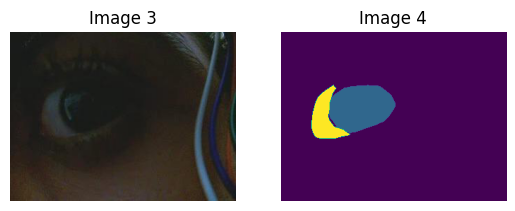

In [29]:
image3 = Image.open(image_path3)
image4 = Image.open(image_path4)

width, height = image3.size
print(f"image3: {width} / {height}")
width, height = image4.size
print(f"image4: {width} / {height}")

plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(image3)
plt.axis('off')
plt.title('Image 3')

plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(image4)
plt.axis('off')
plt.title('Image 4')

plt.show()

In [4]:
image_path1 = './dataset/eye_image_seg/train\WhatsApp-Image-2023-06-07-at-21-17-050_jpg.rf.93aaa3075617070913a35954320b77ac.jpg'
image_path2 = './dataset/eye_image_seg/train\WhatsApp-Image-2023-06-07-at-21-17-050_jpg.rf.93aaa3075617070913a35954320b77ac_mask.png'

image1: 768 / 1024
image2: 768 / 1024


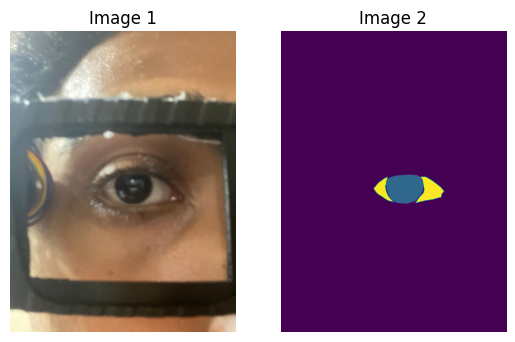

In [8]:
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

width, height = image1.size
print(f"image1: {width} / {height}")
width, height = image2.size
print(f"image2: {width} / {height}")

plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(image1)
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(image2)
plt.axis('off')
plt.title('Image 2')

plt.show()